# **3.3 - Herança e Hereditariedade** 🫛 
**Objetivo**: Modele algum conceito científico utilizando herança de classes.
***

### **Introdução** 💡

<p style="text-align: justify;">
Segundo as fontes [1][2], a hereditariedade pode ser definida como a transmissão de características em seres vivos de uma geração para outra. Em 1865, o monge austríaco Gregor Mendel começou a estudar, através de experimentos com ervilhas, como esse processo funciona. A partir de seus resultados, ele conseguiu concluir que essa herança ocorria por meio de um par de fatores herdados, denominados genes. 
</p>

<p style="text-align: justify;">
Atualmente, sabe-se que os genes armazenam a informação genética (DNA, ou Ácido desoxirribonucleico) e são formados por um par de alelos. Na herança genética, o indivíduo herda um alelo da cada progenitor, o que possibilita a variabilidade genética de uma população. A expressão do fenótipo (isto é, expressão das características presentes em um genótipo) dependerá da dominância: Em um caso de herança simples (que não envolve codominância ou dominância incompleta), se o indíviduo possui ao menos um alelo portador da característica dominante, ele possuirá a característica fenotípica dominante. A característica recessiva, por outro lado, só se apresentará em homozigose (ou seja, dois alelos recessivos).
</p>

<p style="text-align: justify;">
Em Python, também é possível observar o conceito de hereditariedade! Temos que uma classe pode herdar os métodos de uma classe mãe. Para testar esse conceito, podemos modelar a herança genética através da herança de classes. Uma classe irá representar os genes (tendo como principal método a expressão genética), enquanto a segunda, relativa a Hereditariedade, herdará a classe Gene para explorar outros conceitos.
</o>

### **Importação de Bibliotecas** 📚

In [39]:
import pandas as pd

### **Classe Gene** 🧬

A classe gene representará um gene de um indíviduo, sendo inicializado por dois alelos. Além dos métodos __dunder __, a classe incluirá o método expressao, o qual determinará, com base no alelo dominante, qual será a expressão gênica do indivíduo.

In [ ]:
class Gene:
    def __init__(self, alelo1, alelo2):
        """Inicialização do gene
        Args:
        alelo1: string que representa o primeiro alelo do indivíduo
        alelo2: string que representa o segundo alelo do indivíduo
        """
        
        self.alelo1 = alelo1
        self.alelo2 = alelo2
    
    def __repr__(self):
        """Representação da instância criada"""
        
        return f"O gene em questão é composto pelos alelos: {self.alelo1} e {self.alelo2}"
    
    def Expressao(self, dominante, caracteristica_dominante, caracteristica_recessiva):
        
        """Determina qual será a característica expressa pelo indíviduo
        Args:
        dominante: string que indica qual é o alelo dominante
        caracteristica_dominante: string que indica qual é a característica fenotípica dominante
        caracteristica_dominante: string que indica qual é a característica fenotípica recessiva

        """
        
        if dominante in [self.alelo1, self.alelo2]:
            return f"A característica expressa pelo indivíduo será {caracteristica_dominante} (Característica dominante)"
        else:
            return f"A característica expressa pelo indivíduo será {caracteristica_recessiva} (Característica recessiva)"

Agora podemos testar a classe, inicializando uma instância e testando os demais métodos!

In [41]:
gene_individuo = Gene("A", "a")

In [32]:
gene_individuo

O gene em questão é composto pelos alelos: A e a

In [33]:
gene_individuo.Expressao("A", "olhos claros", "olhos escuros")

'A característica expressa pelo indivíduo será olhos claros (Característica dominante)'

### **Classe Hereditariedade** 👨‍👩‍👧‍👦

A classe Hereditariedade, que herdará a classe Gene, além de indicar a expressão fenotípica com base nos genes do indivíduo, calculará a probabilidade do indíviduo ter aquela configuração genotípica com base nos alelos dos progenitores (método Probabilidade). Além disso, para representar graficamente esse cruzamento genético, um dataframe de um quadro de Punnett poderá ser exibido, o qual demonstra todas as possibilidades de cruzamentos possíveis com base nos alelos dos progenitores. [3]

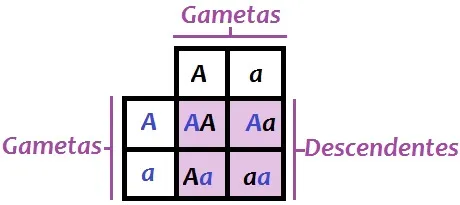

[Funcionamento de um quadro de Punnett] [3]

In [ ]:
class Hereditariedade(Gene):
    
    def __init__(self, alelo1, alelo2, alelos_pai, alelos_mae):
        """Inicialização da instância
        Args:
        alelo1: string que representa o primeiro alelo do indivíduo
        alelo2: string que representa o segundo alelo do indivíduo
        alelos_pai: lista ou tupla com os alelos do pai do indivíduo
        alelos_mae: lista ou tupla com os alelos da mãe do indivíduo
        """
        
        super().__init__(alelo1, alelo2)
        
        if len(alelos_pai) == 2 and len(alelos_mae) == 2:
            self.alelos_pai = alelos_pai
            self.alelos_mae = alelos_mae
            self.gene_pai = "".join(sorted(self.alelos_pai)) 
            self.gene_mae = "".join(sorted(self.alelos_mae))  
        else:
            raise ValueError("O gene precisa ser determinado por uma lista de dois alelos!")

        self.gene_individuo = "".join(sorted(self.alelo1 + self.alelo2))
        self.genes_provaveis = ["".join(sorted(self.alelos_pai[0]+self.alelos_mae[0])), 
                           "".join(sorted(self.alelos_pai[0]+self.alelos_mae[1])), 
                           "".join(sorted(self.alelos_pai[1]+self.alelos_mae[0])), 
                           "".join(sorted(self.alelos_pai[1]+self.alelos_mae[1]))]
        
    def __repr__(self):
        """Representação da instância criada"""
        
        return f"O genes do indivíduo, do pai e da mãe são, respectivamente: {self.gene_individuo}, {self.gene_pai}, {self.gene_mae}"
    
    def Probabilidade(self):
        """Calcula a probabilidade do indíviduo possuir a combinação de alelos com base nos genes dos progenitores"""
        
        if self.gene_individuo not in self.genes_provaveis:
            return "O gene do indivíduo não poderia ter sido formado pelos alelos dos progenitores"
        else:
            quant_casos = 0
            for gene in self.genes_provaveis:
                if gene == self.gene_individuo:
                    quant_casos += 1
            return f"A probabilidade do indivíduo possuir o genótipo apresentado era de {quant_casos/len(self.genes_provaveis) *100} %"
        
    def QuadroPunnett(self):
        """Representação gráfica do cruzamento genético por meio de um dataframe"""
        
        quadro_punnet = pd.DataFrame(
            {
                self.alelos_pai[0]: ["".join(sorted(self.alelos_pai[0]+self.alelos_mae[0])), "".join(sorted(self.alelos_pai[0]+self.alelos_mae[1]))],
                self.alelos_pai[1]: ["".join(sorted(self.alelos_pai[1]+self.alelos_mae[0])), "".join(sorted(self.alelos_pai[1]+self.alelos_mae[1]))],
            }, index=[self.alelos_mae[0], self.alelos_mae[1]])
        return quadro_punnet

Novamente, podemos agora testar a classe e seus respectivos métodos! Para esse teste, tanto o indivíduo quanto os progenitores serão heterozigotos para a característica analisada.

In [35]:
genetica_mendeliana = Hereditariedade("A", "a", ["A", "a"], ["A", "a"])

A partir da herança da classe Gene, é possível utilizar o método Expressao para determinar qual será a característica expressa pelo indivíduo.

In [36]:
genetica_mendeliana.Expressao("A", "olhos escuros", "olho claros")

'A característica expressa pelo indivíduo será olhos escuros (Característica dominante)'

Além disso, os métodos próprios da classe Hereditariedade também podem ser utilizados.

In [37]:
genetica_mendeliana.Probabilidade()

'A probabilidade do indivíduo possuir o genótipo apresentado era de 50.0 %'

In [38]:
genetica_mendeliana.QuadroPunnett()

,A,a
A,AA,Aa
a,Aa,aa


Temos que a probabilidade apresentada do indivíduo possuir os alelos em questão era de 50%. Esse resultado condiz com o esperado, dado que, pelos resultados de Mendel, o cruzamento entre dois heterozigotos resultaria em uma chance de 50% da formação de outro heterozigoto para essa característica, 25% para dominante e 25% para recessivo. Esse resultado também faz sentido com o quadro de Punnett, o qual demonstra que o cruzamento formaria um heterozigoto em dois dos quatro casos possíveis. Logo, podemos concluir que os métodos aplicados mostram-se efetivos!

### **Conclusão** 🧪

<p style="text-align: justify;">
A partir dessa tarefa, foi possível concluir que as classes podem ser ferramentas úteis para a modelagem de fenômenos científicos. Além disso, o conceito de herança mostrou-se especialmente útil para esse tipo de abordagem, pois abre margem para a representação de problemas complexos com base em representações inicialmente mais simples. Ou seja, no problema proposto, temos que a classe Gene é autossuficiente (podendo ser usada para a descoberta da experessão fenotípica), mas é importante para complementar a classe Hereditariedade (que busca avaliar um caso mais complexo, envolvendo cruzamento genético).
</p>

### **Referências** 🗃️

[1] COOPER, Geoffrey M. Heredity, Genes, and DNA. In: The Cell: A Molecular Approach. 2nd edition. [s.l.]: Sinauer Associates, 2000. Disponível em: <https://www.ncbi.nlm.nih.gov/books/NBK9944/>. Acesso em: 17 mar. 2025.

[2] O que é Hereditariedade, como ocorre e exemplos. Toda Matéria. Disponível em: <https://www.todamateria.com.br/hereditariedade/>. Acesso em: 17 mar. 2025.

[3] Quadro de Punnett. Utilização do Quadro de Punnett. Biologia Net. Disponível em: <https://www.biologianet.com/genetica/quadro-punnett.htm>. Acesso em: 17 mar. 2025.